# Data Analaytics

Notebook used to compute the analytics of our reference standard data. First the percentage per size is computed then, the number of WMHs per subject. Both plots are the ones used on the final report.

Requirements not available in this repository:
* To be able to run this code one needs to run it in an eviroment with the python packages: __numpy__, __seaborn__, __matplotlib__, __pandas__.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

from utils import excel_data

sns.set()

[Text(0, 0, 'Small'), Text(0, 0, 'Medium'), Text(0, 0, 'Big')]

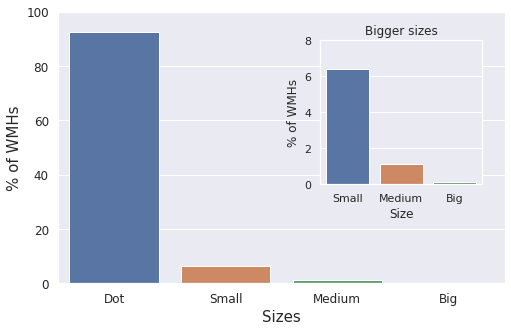

In [2]:
# List of the size for each WMH in the data
df = pd.DataFrame({'Size': [row['SIZE'] for row in excel_data]}).astype('category')

# Compute percentages for each size
df = ((df['Size'].value_counts(normalize = True) * 100).reset_index(name = '% of WMHs')
                                             .rename(columns={'index': 'Size'}))

# Graph main plot
fig, ax = plt.subplots(figsize = (8, 5))
sns.barplot(y = '% of WMHs', x = "Size", data=df, ax=ax, order=['d', 'p', 'm', 'g'])
ax.set_xlabel('Sizes', fontsize=15)
ax.set_ylabel('% of WMHs', fontsize=15)
ax.set_yticks(np.arange(0, 120, 20))
ax.tick_params(labelsize=12)
ax.set_xticklabels( ('Dot', 'Small', 'Medium', 'Big') )

# Graph zoom in plot
ax2 = plt.axes([0.58, 0.4, .28, .4])
sns.barplot(y = '% of WMHs', x = "Size", data = df[df.Size != 'd'],
            ax = ax2, order=['p', 'm', 'g'])
ax2.set_title('Bigger sizes')
ax2.set_yticks(np.arange(0, 10, 2))
ax2.set_xticklabels( ('Small', 'Medium', 'Big') )

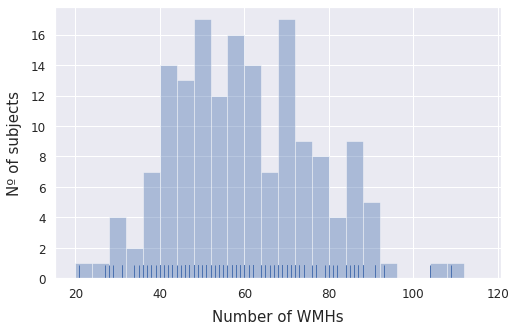

In [3]:
# Compute number of WMH per subject
df = pd.Series(Counter([row['CODI'][:15] for row in excel_data]))

# Make the histogram of the data
fig, ax = plt.subplots(figsize = (8, 5))
ax = sns.distplot(df, rug = True, kde=False, bins=np.arange(20, 120, 4))
ax.set_xlabel('Number of WMHs', fontsize=15, labelpad=8)
ax.set_ylabel('Nº of subjects', fontsize=15, labelpad=8)
ax.tick_params(labelsize=12)